<div style="background-color: #323031; color:#ffffff; padding:30px; border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;">

# Python for Accounting - Session 2

&nbsp;

Welcome to the Python for Accounting practical sessions. 

This series of practical sessions consists of three separate sessions, that will teach you to work with stock data and financial documents in Python. 

<div  style="color:#1b1b1b; background-color:#f2f2f2; border: 0px; padding:30px; -moz-border-radius: 10px; -webkit-border-radius: 10px;">
    
#### What you will learn in this session

<br>
   
Part 1 - Downloading and visualizing stock prices
- To write and run code and enter text sections in Jupyter Notebooks
- Downloading financial/stock data from yahoo finance
- Using matplotlib to plot stock data with line plots
- Customizing lines and plots
- Combining multiple stock data series in a line plot

<br>
    
Part 2 - Working with returns
- calculating daily returns
- calculating monthly (and annual) returns with grouped aggregation/broadcasting

<br>

<b>What to do when getting stuck</b>:
    <ol>
        <li>Ask the trainer if you struggle to find a solution.</li>
        <li>Search online:</li>
        <ol>
            <li>The answer box on the top of Google's results page</li>
            <li><a href="https://www.stackoverflow.com">stackoverflow.com</a> (task-specific solutions)</li>
            <li><a href="https://www.w3schools.com">w3schools.com</a> (basic python questions)</li>
            <li><a href="https://www.realpython.com">realpython.com</a> (topic-based tutorials)</li>
        </ol>
    </ol>

<br>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Microcosm_of_London_Plate_075_-_New_Stock_Exchange_%28tone%29.jpg/640px-Microcosm_of_London_Plate_075_-_New_Stock_Exchange_%28tone%29.jpg" width="400px" style="margin-left:auto;margin-right:auto">
<br>
<div> The other LSE in 1810</div>

---

## Using Python for Finance

Python is one of the most popular programming languages for data analysis/data science and is also the most popular programming language in fintech. Python is extremely versatile and although it might not be the language of choice for every purpose it certainly can be used for almost anything. Another great feature about Python is that it is very easy to learn and that you can find blogs, tutorials, forum posts or video tutorials on almost any topic. 

Here are some examples of how Python can be used to work with accounting and finance data:
- transform and prepare data for statistical analysis
- explore data through summary statistics and visualizations
- run statistical and machine learning models to make predictions and generate insights from data
- scrape data from websites
- create interactive charts
- build web applications

This course will teach you how to apply Python to carry out accounting and finance specific tasks, such as retrieving stock market data through an API, plotting share prices and calculating new variables from an imported income statements or balance sheets and doing comparisons on these variables across different companies.

## Anaconda and Anaconda Navigator

Anaconda is a Python distribution for data science that together with Anaconda Navigator, a graphical user interface for a range of applications
aims to provide a user-friendly working environment for beginners and experienced users. With Anaconda, you get base Python, the most important data science libraries and applications to write and run Python scripts with one installer, which simplifies the installation process.

Anaconda is great for beginners since a wide range of data science libraries are already preinstalled and it makes it easy to install additional libraries and manage environments with conda, which is the package manager of the Anaconda distribution. Here is a [conda cheatsheet](https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf) with the most important commands to install and manage libraries and environments.

In addition, Anaconda Navigator offers a GUI to choose from a number of popular applications to write Python code, such as jupyter notebook, Spyder and VS Code.



### Installing libraries with conda

The Anaconda repository is a Python library storage system that hosts several thousand libraries. The Anaconda repository is organized into a multitude of channels, the most commonly used being conda and conda-forge, which are managed by the Anaconda and condas-forge team respectively. The conda repository is the default channel which hosts the most commonly used libraries. Conda-forge stores libraries that are not yet part of the official Anaconda distribution. Although it probably won't make much of a difference whether you use conda or conda-forge, there are two reasons for why you might want to prefer conda-forge. Libraries on conda-forge are likely to be more up to date and you are also more likely to find a library on conda-forge.

Below are two examples of how to install a library using conda

In [ ]:
# installing pandas without specifying the channel
conda install pandas

In [ ]:
# installing specific version from conda-forge channel
conda install pandas==1.5 -c conda-forge

## Installing yfinance

The Anaconda distribution contains many of the most important libraries used for data science. The **yfinance** library however, which we will use to download stock price data from yahoo finance, is not part of it and has to be installed by the user. We use the `pip install` command to install the library. Most libraries that are used in the context of data analysis and machine learning are available from the conda repository. Since the yfinance library is not available from conda, we need to use the general Python package management system pip to install the library.

In [ ]:
pip install yfinance


&nbsp;

---

<br>

## Part 1 - Downloading and visualizing stock prices

The part of this workshop introduces you to how to download stock price data from yahoo finance with Python and how to generate line plots to visualize the development of the stock's price over time.

We will use the `pandas_datareader` library to download the historical stock data.

### Task 1 - Installing yfinance

1. Use the conda list command to check wether the yfinance library is installed on your PC. It should display the name, version, build and channel.

```python
    conda list yfinance
```

2. If the library is not listed, use `pip install yfinance` to install it. Once the library has been installed run `conda list yfinance` to verify the installation. 

In [1]:
conda list yfinance

# packages in environment at /Users/michaelwiemers/opt/miniconda3/envs/sklearn:
#
# Name                    Version                   Build  Channel
yfinance                  0.2.9                    pypi_0    pypi

Note: you may need to restart the kernel to use updated packages.


&nbsp;

&nbsp;


## Downloading financial data from yahoo finance

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/Bitcoin_logo.svg/1920px-Bitcoin_logo.svg.png" width="200px" align="left">

To download stock data from yahoo finance we will use the yfinance library. 

For this example, we are going to download the **Bitcoin to GBP rate**. There are more detailed explanations on the code below.

In [ ]:
# importing libraries
import yfinance as yf
import pandas as pd

# creating a start and end date
start = '2020-01-01'
end = '2022-11-30'

# creating a variable for the ticker
ticker = 'BTC-GBP'

# downloading the bitcoin to gbp rate
btc = yf.download(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


#### Line 2f: Importing libraries

```python
import yfinance as yf
import pandas as pd
```

In order to import and work with stock price data from yahoo finance, we will need the following libraries:

- yfinance: To download stock price data 
- pandas: To work with the financial data as a dataframe

#### Line 6f: Creating a start and end date


```python
start = '2020-01-01'
end = '2022-11-30'
```

The `yf.download()` function does not require a start and end date. If no dates are provided, it will return the entire data available from yahoo finance.

The dates are created as strings. The function expects the `%y-%m-%d` format, which stands for year-month-day.

#### Line 10: Creating a ticker variable

```python
ticker = 'BTC-GBP'
```

The ticker is a symbol to uniquely identify a stock. You can search the ticker on the yahoo finance website (see below). We store the ticker `'BTC-GBP'`for the Bitcon to British Pound rate in the variable `ticker`.

#### Line 13: Downloading the data

```python
btc = yf.download(ticker, start, end)
```

To download the data for the Bitcoin-GBP rate, we are going to use the `download()` function from the `yfinance` module to download the historical stock price data from finance.yahoo.com.

The `yf.download()` function requires only a ticker arguments. The start and end arguments to specify the time range of the data are optional.

We can now have a look at the data.

In [ ]:
btc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-01,5472.485840,5407.095215,5425.667969,5433.849121,1.401119e+10,5433.849121
2020-01-02,5437.121094,5277.165039,5435.643066,5313.357910,1.582269e+10,5313.357910
2020-01-03,5662.306641,5263.736328,5312.565918,5615.142090,2.149114e+10,5615.142090
2020-01-04,5678.214355,5588.101562,5615.517578,5665.424805,1.410059e+10,5665.424805
2020-01-05,5764.659668,5659.478027,5665.268066,5666.796875,1.508207e+10,5666.796875
...,...,...,...,...,...,...
2022-11-24,13880.291016,13598.182617,13755.100586,13708.679688,2.157219e+10,13708.679688
2022-11-25,13709.059570,13541.657227,13706.867188,13662.323242,1.544552e+10,13662.323242
2022-11-26,13784.529297,13577.239258,13662.105469,13616.981445,1.488712e+10,13616.981445


---

<img src="https://www.dropbox.com/s/ijgo4f0sm3k2xc0/tesco_ms.png?raw=1" align="left" width=400px>

### Task 2: Import the stock data from Tesco and Marks and Spencer

1. Import the relevant libraries as shown above.
2. Search for the ticker for Tesco and Marks and Spencer from the London Stock Exchange on https://uk.finance.yahoo.com/

<img src="https://www.dropbox.com/s/ggjn22cr2vhru8q/yahoo_finance.png?raw=1" width=500px>

3. Create as a start date 2010 and today as the end date.
4. Import the stock data using yahoo finance as the source and store both in separate variables.
5. Export both datasets as a csv.
6. Print the head of each dataset.
7. The start and end date are optional parameters. How else can you get the data from the past 10 years, apart from entering the end date?

In [9]:
# import libraries
import yfinance as yf
import pandas as pd

# set ticker variables
ticker1 = 'MKS.L'
ticker2 = 'TSCO.L'


# set start and end dates
start = '2010'

# download stock data
mks = yf.download(ticker1, start)
tsco = yf.download(ticker2, start)

In [58]:
# export stock data to csv
mks.to_csv('mks.csv')
tsco.to_csv('tsco.csv')

In [59]:
# print head of each dataset
mks.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,391.808685,379.941498,384.023804,391.523895,9607789.0,250.705627
2010-01-05,389.245392,381.175690,389.245392,384.403595,14440266.0,246.146271
2010-01-06,372.061615,356.396912,369.308411,358.295593,49485008.0,229.428452
2010-01-07,358.960205,350.890503,356.112091,352.219604,19742326.0,225.537827
2010-01-08,353.928497,346.523285,352.504395,347.852509,21221404.0,222.741440


In [60]:
# print head of each dataset
tsco.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,545.806396,538.523071,542.006409,542.639709,6520208.0,310.860504
2010-01-05,536.939697,529.783081,536.686401,532.569702,13344524.0,305.091705
2010-01-06,533.646423,518.953125,533.203125,521.929688,25619244.0,298.996429
2010-01-07,529.656372,521.676392,522.626404,521.866394,13978624.0,298.960144
2010-01-08,526.869690,520.029724,521.549683,526.869690,16293960.0,301.826355


---

## Inspecting a dataset

### Getting an overview of the data

Pandas has a number of useful methods to get an overview of your dataset. Try a websearch if you cannot remember the method from the courses on dataquest.io to solve the task.

### Task 3: Inspecting the dataset

1. Print the column types of the Tesco and Marks and Spencer stock dataset.
2. Print the number of rows of both datasets. You should find that there is one row less for the Tesco stock price data.
3. Print the the first and last value in the Adjusted Close column of each dataset.
4. Print the descriptive statistcs (mean, min, max, standard deviation, etc) of the Adjusted Close column of each dataset.

**Bonus task:** Can you identify the date where the Marks and Spencer stock was, but the Tesco stock wasn't traded?

<br>

In [27]:
#Print the column types of the Tesco and Marks and Spencer stock dataset.
mks.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [56]:
#Print the number of rows of both datasets.
print(len(mks))
print(len(tsco))

3259
3258


In [63]:
#Print the the first and last value in the Close column of each dataset.
display(mks.iloc[[0, -1]])
display(tsco.iloc[[0, -1]])

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,391.808685,379.941498,384.023804,391.523895,9607789.0,250.705627
2022-11-24,127.849998,125.000000,125.550003,127.029297,1103467.0,127.029297


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,545.806396,538.523071,542.006409,542.639709,6520208.0,310.860504
2022-11-24,237.800003,235.600006,236.100006,237.199997,1170970.0,237.199997


In [113]:
#Print the descriptive statistics for the Adjusted Close column of each dataset.
(
    pd
    .DataFrame(
        {
            'mks_adj_close': mks['Adj Close'],
            'tsco_adj_close': tsco['Adj Close']
        }
    )
    .describe()
)


,mks_adj_close,tsco_adj_close
count,3259.000000,3258.000000
mean,247.122977,231.606796
std,77.419460,52.842790
min,85.040001,122.728806
25%,204.850418,188.733013
50%,248.603729,223.101837
75%,290.080261,276.495384
max,448.965210,329.726990


In [136]:
mks.index[~mks.index.isin(tsco.index)]

DatetimeIndex(['2021-07-29'], dtype='datetime64[ns]', name='Date', freq=None)

---

## Plotting with matplotlib

Matplotlib is the most popular plotting library in Python. It allows you to create many different plots with very few code. Although creating more complex plots, can be challenging, it isn't difficult to find useful help in [blog posts](https://towardsdatascience.com/matplotlib-tutorial-learn-basics-of-pythons-powerful-plotting-library-b5d1b8f67596), [tutorials](https://realpython.com/python-matplotlib-guide/), on [stackoverflow.com](https://stackoverflow.com/questions/tagged/matplotlib?sort=MostVotes&edited=true) or the documentation and tutorials on the [matplotlib website](https://matplotlib.org/tutorials/).

We are going to use the **matplotlib** library to plot the Bitcoin to British Pound rate as a function of time. We can use the **index** of the **btc** data frame to retrieve the date and the **Adj Close** column to plot the Bitcoin to Pound rate.

### Simple line plot

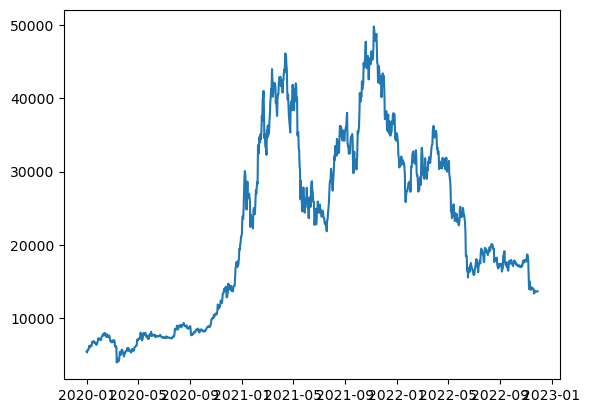

In [24]:
#import matplotlib
import matplotlib.pyplot as plt

# plot Adj Close column
plt.plot(btc.index, btc['Adj Close'])

plt.show()

#### Line 1: Importing matplotlib

```python
import matplotlib.pyplot as plt
```

We start by importing the `pyplot` module from the `matplotlib` library under the alias `plt`.

#### Line 3: line plot

```python
plt.plot(btc.index, btc['Close'])
```

From the `plt` module we call the `plot()` function and we pass as arguments the **index** and the **Close** column of the btc dataframe. The values for the x and y axis are positional arguments, which means they have to be passed in this order.

#### Line 4: plt.show()

```python
plt.show()
```

The `plt.show()` command is used to display matplotlib figures. It is actually not necessary to run the plt.show() command in a Jupyter notebook to display the figures, but you would have to use it to display a plot in a normal Python script for instance.

### Task 4: A simple line plot

1. Import matplotlib
2. Create a line plot of the Adjusted Close column of the Tesco stock on the y-axis and the date on the x-axis.

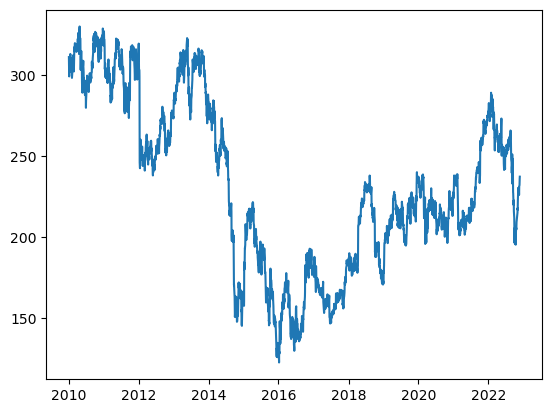

In [141]:
import matplotlib.pyplot as plt

plt.plot(tsco.index, tsco['Adj Close'])
plt.show()

---

## Customized line plot

In the next step, we will customize the look of the plot by changing colors, adding labels and text and adding a grid. See explanations on the code below.

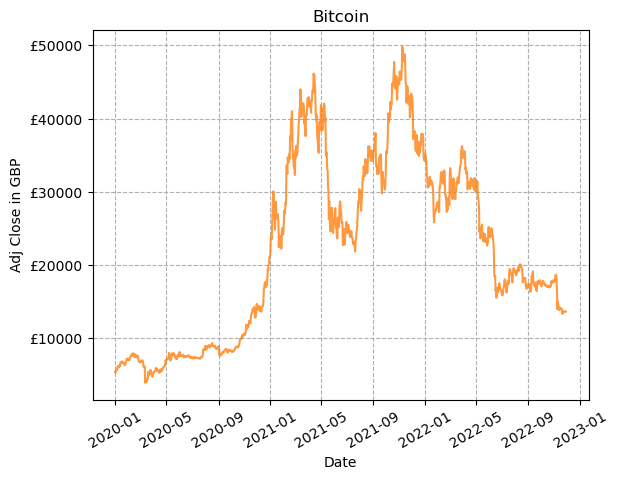

In [56]:
plt.plot(btc.index, btc['Adj Close'], c='tab:orange', lw=1.5, alpha=0.8)

plt.title('Bitcoin') # adding a plot title
plt.xlabel('Date') # adding an x-axis label
plt.ylabel('Adj Close in GBP') # adding a y-axis label
plt.xticks(rotation=30)
plt.yticks([10000, 20000, 30000, 40000, 50000]
           ,['£10000', '£20000', '£30000', '£40000', '£50000']
          )
plt.grid(linestyle='--') # adding a grid to the plot

plt.show()

#### Line 1: Changing the appearance of the line


```python
plt.plot(btc.index, btc['Adj Close'], color='tab:orange', linewidth=1.5, alpha=.8)
```
We can change the appearance of the line with several keyword arguments to be passed to the `plt.plot()` function. 

We use the `color` argument to change the colour to the tableau orange with `'tab:orange'`. Have a look at the [matplotlib documentation](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) for a colour palette and corresponding names.

The `linewdith` argument takes float values to adjust the width of the line.

With the `alpha` argument you can change the transparency of the line. You have to pass a value between 0 and 1.

#### Line 3-5: Adding a title and labels


```python
plt.title('Bitcoin')
plt.xlabel('Date')
plt.ylabel('Price in GBP')
```

To add a title and labels for the x- and y-axis, we use `plt.title()`, `plt.xlabel()` and `plt.ylabel()` and pass a string for the title and axes labels.

#### Line 6: Changing x-tick orientation

```python
plt.xticks(rotation=30)
```
The orientation of the x-ticks can be adjusted by passing a degree value to the rotation parameter from the `plt.xticks()` function.


#### Line 7-8: Adding tick labels on y-axis

```python
plt.yticks([10000, 20000, 30000, 40000, 50000],
           ['£10000', '£20000', '£30000', '£40000', '£50000'])
```

We can change the tick labels on the y-axis with `plt.ticks()` to display numbers preceded with a Pound symbol. To do this, we have to pass two lists to the function - the first containing the tick positions (10000 - 50000) and the second containing the string values that should be displayed at each tick position. 

#### Line 8: Addng a grid
```python
plt.grid(linestyle='--')
```

`plt.grid(linestyle='--')` adds a grid. With the `linestyle` argument we can change the from a solid to a dashed line.

### Task 5: Customizing the line plot

1. Adjust the colour, linewidth and alpha
2. Add a title and axis labels
3. Change the yticks to display a pound sign before the numbers
4. Add a grid

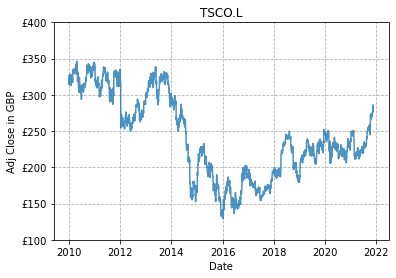

---

## Adding a second data series and a legend

In the example below, a second line with the adjusted close price for Ethereum, which is another crypto currency, is added to the plot. See below for detailed explanations on the code.

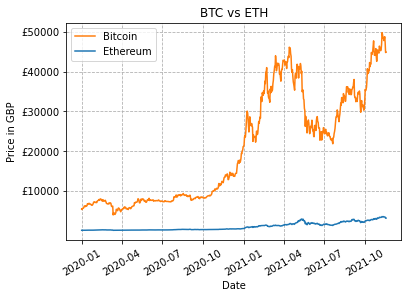

In [106]:
eth = yf.download('ETH-GBP', start, end)

plt.plot(btc.index, btc['Adj Close'], color='tab:orange', label='Bitcoin') # plotting the first line
plt.plot(eth.index, eth['Adj Close'], color='tab:blue', label='Ethereum') # plotting the second line

plt.title('BTC vs ETH')
plt.xlabel('Date')
plt.ylabel('Price in GBP')
plt.xticks(rotation=30)
plt.yticks([10000, 20000, 30000, 40000, 50000],
           ['£10000', '£20000', '£30000', '£40000', '£50000'])
plt.grid(linestyle='--')
plt.legend() # displaying the legend using labels from plt.plot()

plt.show()

#### Line 3f: Plotting two lines in the same plot

```python
plt.plot(btc.index, btc['Adj Close'], color='tab:orange', label='Bitcoin')
plt.plot(eth.index, eth['Adj Close'], color='tab:blue', label='Ethereum')
```

To add a second data series to the plot, you can add another `plt.plot()` call. In the example below, a second line is created by using the values from the Adj Close column of the Ethereum data. To better differentiate the two lines the colour is set to `tab:blue` and a label is applied with the `label` argument.

#### Line 13: Adding a legend

```python
plt.legend()
```

With `plt.legend()` the legend is being displayed in the plot area. The legend will use the labels that we added to the lines with the `label` argument in line 1 and 2.

### Task 6: Adding a second line

1. Add a second line to the plot for the Marks and Spencer Adj Close column
2. Add labels to both lines
3. Add a legend
4. Adjust the title
5. Adjust the yaxis ticks

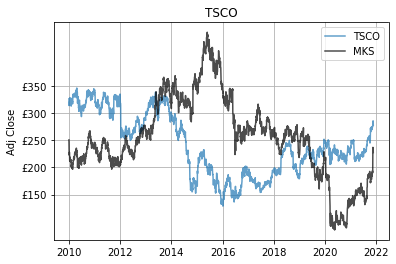

<br>

---

<br>

<br>

## Part 2 - Working with Returns

In this part, you will learn how to calculate returns for each day, month and year and how to create new columns for these values in the stock price dataframe that you downloaded from yahoo finance.

We will use the Netflix stock price data, which has seen a phenomenal growth over the last decade. The first six months of 2022, however, have shown a rapid decline in the stock's price.

<br>

<br>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Netflix_2015_logo.svg/800px-Netflix_2015_logo.svg.png" width="40%" align="left">

In the first two task, you will download and visualize the Netflix stock price with a line chart that adds a shaded area under the curve to make it look visually more appealing. 

### Task 1: Import netflix stock

1. Import the libraries to import stock data from yahoo finance
2. Search for the ticker for the Netflix stock on the yahoo finance website
3. Import the Netflix stock data from 2009 till today
4. Print the head of the dataframe
5. Print the first and last date to verify the download of the data using the loc operator.

(Check back on the materials from the 1st practical session if you do not remember the name of the libraries, functions or how to use them exactly)

In [178]:
import yfinance as yf
import pandas as pd

nflx = yf.download('nflx', start='2009-01-01')

nflx.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-02,4.357143,4.200000,4.217143,4.267143,6605200.0,4.267143
2009-01-05,4.562857,4.302857,4.327143,4.562857,13044500.0,4.562857
2009-01-06,4.750000,4.590000,4.591429,4.705714,12065900.0,4.705714
2009-01-07,4.734286,4.571429,4.715714,4.672857,10133900.0,4.672857
2009-01-08,4.797143,4.485714,4.618571,4.735714,8175300.0,4.735714


In [2]:
nflx.iloc[[0, -1]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-02,4.357143,4.200000,4.217143,4.267143,6605200.0,4.267143
2009-01-05,4.562857,4.302857,4.327143,4.562857,13044500.0,4.562857
2009-01-06,4.750000,4.590000,4.591429,4.705714,12065900.0,4.705714
2009-01-07,4.734286,4.571429,4.715714,4.672857,10133900.0,4.672857
2009-01-08,4.797143,4.485714,4.618571,4.735714,8175300.0,4.735714


2009-01-02 00:00:00
2022-11-01 00:00:00


&nbsp;

&nbsp;

## Calculating returns

In the next step, you are going to calculate daily, monthly and annual returns based for the Netflix stock. Returns tell you how much money an investor would have made over a particular period of time by giving either the absolute or percentual change of the price from one day/month/year to another.

### Calculating daily returns

In the example below, we will use the Amazon stock data which is stored in the dataframe **amzn**. To calculate the daily return, that is, the percentual change from one day to another, we can use the `.pct_change()` method. We apply this method to the **Adj Close** column and assign the result to a new column called **daily_ret**.

In [65]:
amzn[['Adj Close']].pct_change()

,Adj Close
Date,
1997-05-15,NaN
1997-05-16,-0.117028
1997-05-19,-0.012040
1997-05-20,-0.042685
1997-05-21,-0.127392
...,...
2022-11-22,0.008003
2022-11-23,0.009979
2022-11-25,-0.007649


In [66]:
amzn['daily_ret'] = amzn['Adj Close'].pct_change()

As you can see, the new column **daily_ret** has been added to the dataframe. The values indicate the percentual change from one day to another. 

The second value in the **daily_ret** column represents the percentual change from the first to the second value in the **Adj Close** column.

In [67]:
amzn.head()

,High,Low,Open,Close,Volume,Adj Close,daily_ret
Date,,,,,,,
1997-05-15,0.125000,0.096354,0.121875,0.097917,1.443120e+09,0.097917,NaN
1997-05-16,0.098958,0.085417,0.098438,0.086458,2.940000e+08,0.086458,-0.117028
1997-05-19,0.088542,0.081250,0.088021,0.085417,1.221360e+08,0.085417,-0.012040
1997-05-20,0.087500,0.081771,0.086458,0.081771,1.093440e+08,0.081771,-0.042685
1997-05-21,0.082292,0.068750,0.081771,0.071354,3.770640e+08,0.071354,-0.127392


### Task 3: Daily Netflix returns

Add a column to the netflix dataframe on the daily returns.

In [184]:
nflx['daily_ret'] = nflx['Adj Close'].pct_change()

&nbsp;

&nbsp;


## Calculating total returns

As you can see in the **daily_ret** column, we cannot calculate the product of these values to yield the return over several days, months or years, since these values are all close to zero.

In [68]:
amzn.head()

,High,Low,Open,Close,Volume,Adj Close,daily_ret
Date,,,,,,,
1997-05-15,0.125000,0.096354,0.121875,0.097917,1.443120e+09,0.097917,NaN
1997-05-16,0.098958,0.085417,0.098438,0.086458,2.940000e+08,0.086458,-0.117028
1997-05-19,0.088542,0.081250,0.088021,0.085417,1.221360e+08,0.085417,-0.012040
1997-05-20,0.087500,0.081771,0.086458,0.081771,1.093440e+08,0.081771,-0.042685
1997-05-21,0.082292,0.068750,0.081771,0.071354,3.770640e+08,0.071354,-0.127392


Trying to calculate the return rate for May 1997 using the `.prod()` method on the **daily_ret** values return a number very close to 0.

In [86]:
amzn.head(11)

,High,Low,Open,Close,Volume,Adj Close,daily_ret
Date,,,,,,,
1997-05-15,0.125000,0.096354,0.121875,0.097917,1.443120e+09,0.097917,NaN
1997-05-16,0.098958,0.085417,0.098438,0.086458,2.940000e+08,0.086458,-0.117028
1997-05-19,0.088542,0.081250,0.088021,0.085417,1.221360e+08,0.085417,-0.012040
1997-05-20,0.087500,0.081771,0.086458,0.081771,1.093440e+08,0.081771,-0.042685
1997-05-21,0.082292,0.068750,0.081771,0.071354,3.770640e+08,0.071354,-0.127392
1997-05-22,0.072396,0.065625,0.071875,0.069792,2.355360e+08,0.069792,-0.021891
1997-05-23,0.076042,0.066667,0.070313,0.075000,3.187440e+08,0.075000,0.074622
1997-05-27,0.082292,0.072917,0.075521,0.079167,1.739520e+08,0.079167,0.055560
1997-05-28,0.081771,0.076563,0.081250,0.076563,9.148800e+07,0.076563,-0.032892


In [89]:
(amzn['daily_ret'][:11] + 1).prod() - 1

-0.2340451143747122

We first have to add 1 to all values, calculate the product and then substract 1. 

We start by creating a new column **daily_ret_1**.

In [90]:
amzn['daily_ret_1'] = amzn['daily_ret'] + 1
amzn.head()

,High,Low,Open,Close,Volume,Adj Close,daily_ret,daily_ret_1
Date,,,,,,,,
1997-05-15,0.125000,0.096354,0.121875,0.097917,1.443120e+09,0.097917,NaN,NaN
1997-05-16,0.098958,0.085417,0.098438,0.086458,2.940000e+08,0.086458,-0.117028,0.882972
1997-05-19,0.088542,0.081250,0.088021,0.085417,1.221360e+08,0.085417,-0.012040,0.987960
1997-05-20,0.087500,0.081771,0.086458,0.081771,1.093440e+08,0.081771,-0.042685,0.957315
1997-05-21,0.082292,0.068750,0.081771,0.071354,3.770640e+08,0.071354,-0.127392,0.872608


If we now calculate the return rate for May 1997, we can see that the price decreased by 23.40 %

In [ ]:
ret_05_97 = amzn['daily_ret_1'][:11].prod()
ret_05_97 -= 1
ret_05_97

-0.23404242885547855

<br>

### Task 4 - Calculating total return

The total return is the actual return on investment over a specific period of time. 

We calculated the total return for the first 11 days in the example above.

1. Follow the same steps to calculate the total return for the first 30 days.
    1. Add a new column for the total returns + 1.
    2. Select the first 30 days and calculate the product of the daily_ret_1 column.
    3. Subtract 1 from the result. This yields the total return for the 30 days. The return should be 29.02 %.

<br>

2. Calculate the total return for the first year - 2009.
    1. Select a subset of the data for only 2009. You can use logical indexing with a string to select rows for a specific time period. See the example below.
    2. Calculate the product of the daily_ret_1 column using the 2009 subset.
    3. Subtract 1 from the result. The return for 2009 should be 84.43%.

The code below will select all data from 2000 onwards.

```python
mask = amzn.index >= '2000-01-01'

amz[mask]
```

<br>


In [187]:
nflx['daily_ret_1'] = nflx['daily_ret'] + 1
ret_30d = nflx['daily_ret_1'][:30].prod()
ret_30d -= 1
print(ret_30d)

0.29025772817436746


In [199]:
nflx['daily_ret_1'] = nflx['daily_ret'] + 1
mask = nflx.index < '2010-01-01'
nflx_2009 = nflx[mask]
total_ret = nflx_2009['daily_ret_1'].prod() - 1
print(total_ret)

0.8443254197998962


<br>


## Calculating monthly and annual returns

To calculate monthly returns, we will have to calculate the percentage changes separately for each month. In order to achieve this, we have to group the **amzn** dataframe based on the year and month and then calculate the monthly return rate.

To group the dataframe, we first create a month and year column. We can extract the year and month from the index column **date** by calling the year and month attribute of the index.

In [98]:
amzn.index.month

Int64Index([ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
            ...
            11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
           dtype='int64', name='Date', length=6429)

In [99]:
amzn['year'] = amzn.index.year
amzn['month'] = amzn.index.month

amzn.head()

,High,Low,Open,Close,Volume,Adj Close,daily_ret,daily_ret_1,year,month
Date,,,,,,,,,,
1997-05-15,0.125000,0.096354,0.121875,0.097917,1.443120e+09,0.097917,NaN,NaN,1997,5
1997-05-16,0.098958,0.085417,0.098438,0.086458,2.940000e+08,0.086458,-0.117028,0.882972,1997,5
1997-05-19,0.088542,0.081250,0.088021,0.085417,1.221360e+08,0.085417,-0.012040,0.987960,1997,5
1997-05-20,0.087500,0.081771,0.086458,0.081771,1.093440e+08,0.081771,-0.042685,0.957315,1997,5
1997-05-21,0.082292,0.068750,0.081771,0.071354,3.770640e+08,0.071354,-0.127392,0.872608,1997,5


Let us first practice with calculating the annual and then monthly returns before we add them as a new column to the dataframe in the following exercise.

We pass `'year'` to the `.groupby()` method to group the data based on the year column. This will split the **amzn** dataframe into separate groups for each year. From this grouped version of the data, we select the daily returns with `['daily_ret_1]` and aggregate those values with `.prod()`. This calculates the product of the `daily_ret_1` values for each year.

We have to subtract 1 for the values to represent the actual annual return rate.

In [ ]:
annual_ret = amzn.groupby('year')['daily_ret_1'].prod()
annual_ret -= 1
annual_ret

year
1997    1.563830
1998    9.663901
1999    0.421790
2000   -0.795567
2001   -0.304739
2002    0.745841
2003    1.785601
2004   -0.158305
2005    0.064574
2006   -0.163097
2007    1.347694
2008   -0.446459
2009    1.623245
2010    0.338091
2011   -0.038333
2012    0.449278
2013    0.589628
2014   -0.221771
2015    1.177831
2016    0.109456
2017    0.559564
2018    0.284317
2019    0.230278
2020    0.762561
2021    0.134829
Name: daily_ret_1, dtype: float64

Calculating the monthly returns requires us to split the dataframe into smaller groups for each month from each year. We will have to pass a list with name of the **year** and **month** column to the `groupby()` method.

For each of the groups representing a specific month from a specific year, we select the values from the **daily_ret_1** column with `['daily_ret_1]` and calculate the product with `.prod()`. 

Again, we must subtract 1 for the values to present the actual monthly return rate.

In [109]:
monthly_ret = amzn.groupby(['year', 'month'])['daily_ret_1'].prod()
monthly_ret -= 1
monthly_ret

year  month
1997  5       -0.234045
      6        0.027773
      7        0.554065
      8       -0.023916
      9        0.855235
                 ...   
2022  7        0.270596
      8       -0.060615
      9       -0.108622
      10      -0.093451
      11      -0.096837
Name: daily_ret_1, Length: 307, dtype: float64

&nbsp;

### Task 4: Calculating annual and monthly return rates

It is now your turn to carry out the same steps to calculate the annual and monthly return rates for Netflix.

1. Create a new column **year** and **month** for the year and month by extracting that information from the index column.
2. Create a new column **daily_ret_1** to add 1 to the daily returns
3. Calculate the monthly returns.
4. Calculate the annual returns.

In [286]:
nflx['month'] = nflx.index.month
nflx['year'] = nflx.index.year
nflx['daily_ret_1'] = nflx['daily_ret'] + 1

annual_ret = nflx.groupby('year')['daily_ret_1'].prod()
annual_ret -= 1

annual_ret

year
2009    0.844325
2010    2.189327
2011   -0.605635
2012    0.336268
2013    2.976347
2014   -0.072141
2015    1.343784
2016    0.082357
2017    0.550565
2018    0.394353
2019    0.208884
2020    0.671138
2021    0.114124
2022   -0.516134
Name: daily_ret_1, dtype: float64

In [287]:
monthly_ret = nflx.groupby(['year', 'month'])['daily_ret_1'].prod()
monthly_ret -= 1

monthly_ret

year  month
2009  1        0.209910
      2        0.002767
      3        0.184327
      4        0.055685
      5       -0.129993
                 ...   
2022  7        0.286098
      8       -0.005958
      9        0.053140
      10       0.239721
      11      -0.001302
Name: daily_ret_1, Length: 167, dtype: float64